In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import PoissonRegressor
#import sandwich

plt.rcParams['figure.figsize'] = (20.0, 10.0)

acsimport = pd.read_csv (r"ACSimport4.csv") 

print(acsimport)

     Zip_code  total_patients  total_pop  Median Age  Total Female  \
0       10001            6440      25026        36.1         12761   
1       10002           26906      74363        44.8         37707   
2       10003            5563      54671        31.9         28000   
3       10004             523       3310        38.4          1743   
4       10005             884       8664        30.4          4533   
..        ...             ...        ...         ...           ...   
173     11691           20743      68454        31.5         36449   
174     11692            7065      22394        37.0         11464   
175     11693            2661      13029        40.7          7180   
176     11694            3240      21258        45.6         10653   
177     11697             565       3527        50.2          1810   

     Percent Female  Female Tests  Female Positive Tests  Female Positivity  \
0          0.509910          6690                    319           0.047683   
1

In [5]:
##Ordinary least squares regression for HHC Testing Rate

y = acsimport['HHC Tests per 100k']  #response
X = acsimport[['Median Income', 'Median Age', 'Percent Female', 'Percent POC', 'Speaks only English %']] #predictor
X = sm.add_constant(X) #adds a constant term to the predictor
X.head()

,const,Median Income,Median Age,Percent Female,Percent POC,Speaks only English %
0,1.0,96787,36.1,0.509910,0.365460,0.695240
1,1.0,35607,44.8,0.507067,0.682988,0.412759
2,1.0,129981,31.9,0.512155,0.269247,0.797993
3,1.0,204949,38.4,0.526586,0.317523,0.834791
4,1.0,184681,30.4,0.523199,0.269852,0.753207


In [6]:
est=sm.OLS(y, X)
est = est.fit(cov_type="hc0")
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HHC Tests per 100k   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     16.70
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.98e-13
Time:                        21:30:19   Log-Likelihood:                -2134.3
No. Observations:                 178   AIC:                             4281.
Df Residuals:                     172   BIC:                             4300.
Df Model:                           5                                         
Covariance Type:                  hc0                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.642e+05   1.08e+05      1.523      0.128   -4.72e+04    3.76e+05
Median Income            -0.6183      0.098     -6.280      0.000      -0.811      -0.425
Median Age             -466.9974    571.795     -0.817      0.414   -1587.695     653.700
Percent Female          -9.9e+04   1.93e+05     -0.512      0.609   -4.78e+05     2.8e+05
Percent POC           -2505.6223   1.09e+04     -0.230      0.818   -2.38e+04    1.88e+04
Speaks only English %  4.316e+04   1.63e+04      2.644      0.008    1.12e+04    7.52e+04
==============================================================================
Omnibus:                      150.371   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2322.388
Skew:                           3.063   Prob(JB):                         0.00
Kurtosis:                      19.601   Cond. No.                     4.46e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
est.params


const                           331828.207640
Median Income                       -0.469320
Median Age                        -769.618990
Percent Female                  -97822.839549
Percent POC                      -5914.433244
Percent Commercially Insured   -146173.120711
dtype: float64

In [7]:
# Make sure that graphics appear inline in the iPython notebook 
%pylab inline 
# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(X['Median Income'].min(), X['Median Income'].max(), 100)[:, np.newaxis] 
X_prime = sm.add_constant(X_prime) 
# add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(X['Median Income'], y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Median Income") 
plt.ylabel("HHC Tests per 100,000") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 
# Add the regression line, colored in red Populating the interactive namespace from numpy and matplotlib

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<class 'ValueError'>: shapes (100,2) and (6,) not aligned: 2 (dim 1) != 6 (dim 0)

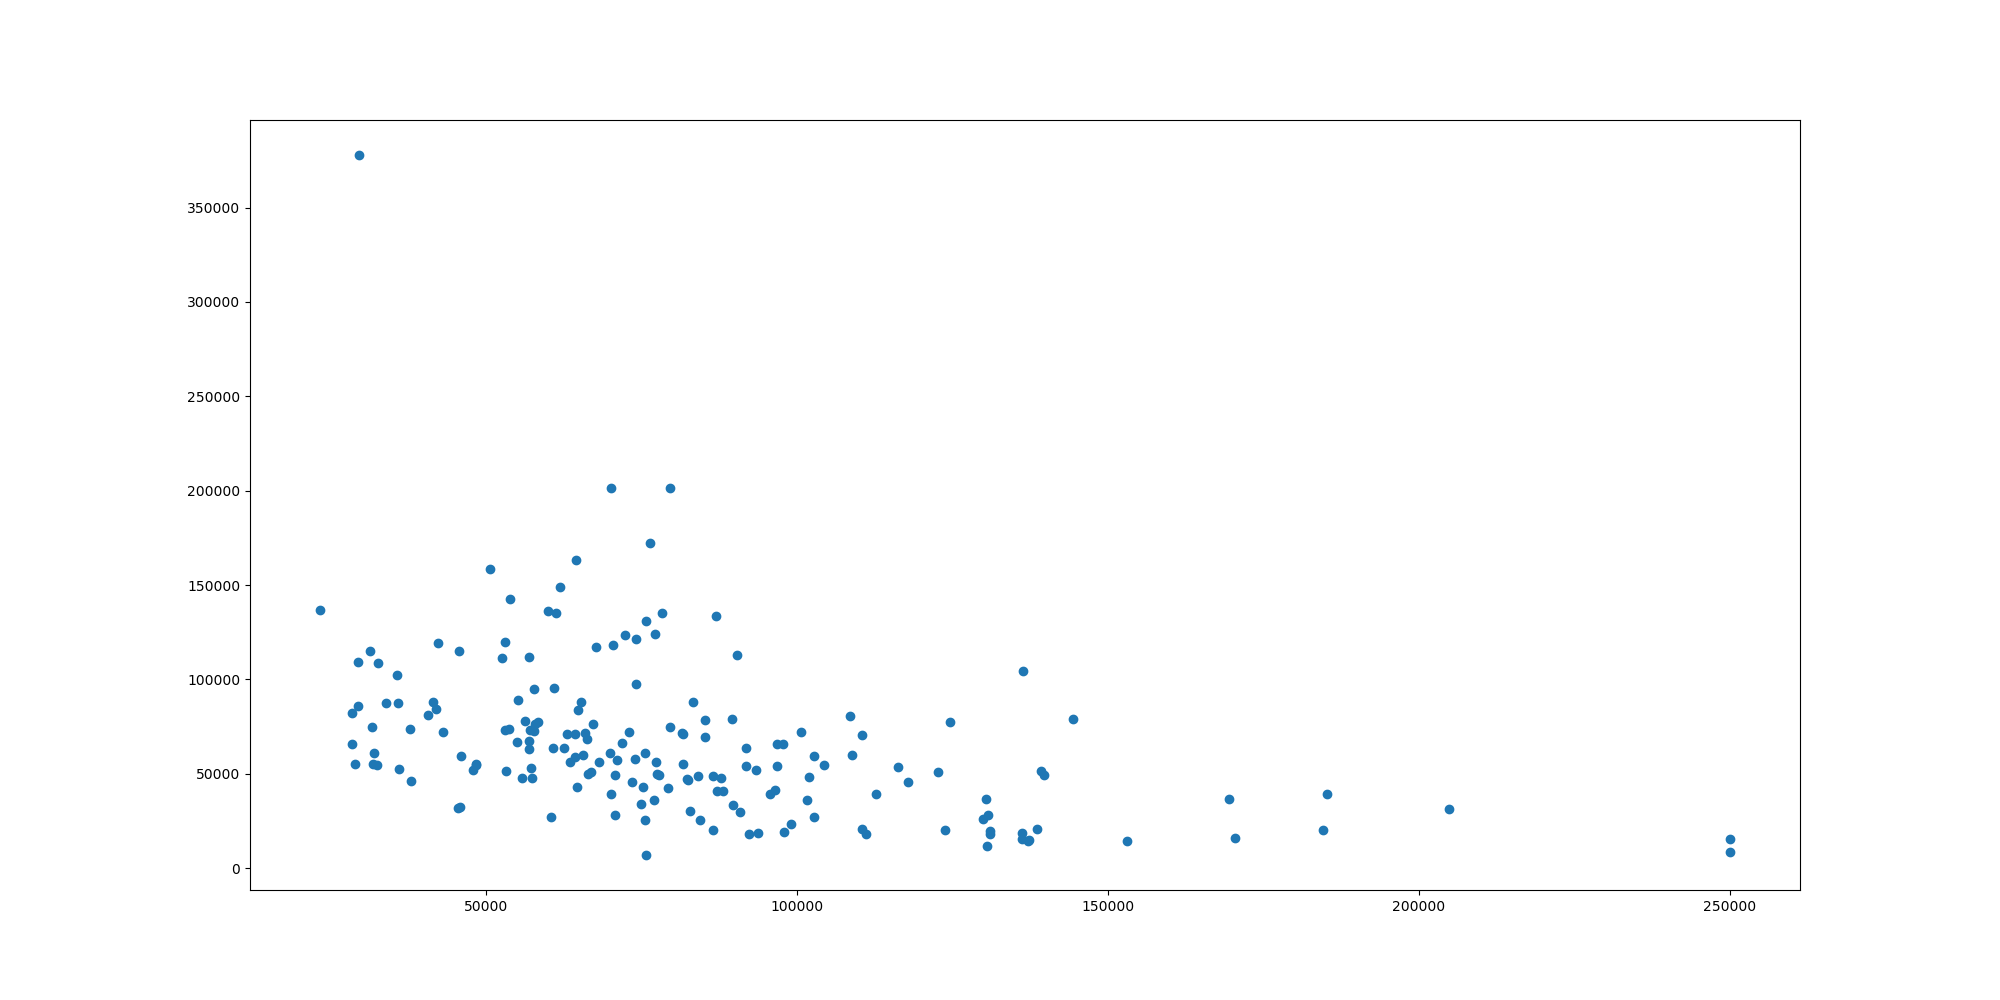

Text(0, 0.5, 'HHC Tests per 100k')

In [12]:
xmi = acsimport["Median Income"]
ytests = acsimport["HHC Tests per 100k"]
plt.scatter(xmi, ytests)
plt.show()
plt.xlabel("Median Income") 
plt.ylabel("HHC Tests per 100k") 



In [9]:
##Ordinary least squares regression for Positivity Rate

y1 = acsimport['positivityratehhc']  #response
X1 = acsimport[['Median Income', 'Median Age', 'Percent Female', 'Percent POC', 'Speaks only English %']] #predictor
X1 = sm.add_constant(X) #adds a constant term to the predictor
X1.head()

,const,Median Income,Median Age,Percent Female,Percent POC,Speaks only English %
0,1.0,96787,36.1,0.509910,0.365460,0.695240
1,1.0,35607,44.8,0.507067,0.682988,0.412759
2,1.0,129981,31.9,0.512155,0.269247,0.797993
3,1.0,204949,38.4,0.526586,0.317523,0.834791
4,1.0,184681,30.4,0.523199,0.269852,0.753207


In [11]:
est1=sm.OLS(y1, X1)
est1 = est1.fit(cov_type="hc0")
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      positivityratehhc   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     50.72
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           4.13e-32
Time:                        21:49:28   Log-Likelihood:                 514.15
No. Observations:                 178   AIC:                            -1016.
Df Residuals:                     172   BIC:                            -997.2
Df Model:                           5                                         
Covariance Type:                  hc0                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1410      0.023      6.105      0.000       0.096       0.186
Median Income         -3.192e-07   4.03e-08     -7.927      0.000   -3.98e-07    -2.4e-07
Median Age               -0.0002      0.000     -0.850      0.395      -0.001       0.000
Percent Female           -0.0719      0.046     -1.577      0.115      -0.161       0.017
Percent POC               0.0021      0.006      0.367      0.713      -0.009       0.013
Speaks only English %    -0.0125      0.007     -1.693      0.090      -0.027       0.002
==============================================================================
Omnibus:                        4.493   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.095
Skew:                           0.161   Prob(JB):                        0.213
Kurtosis:                       2.439   Cond. No.                     4.46e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
est1.params

const                           1.002261e-01
Median Income                  -3.796809e-07
Median Age                      7.237889e-05
Percent Female                 -1.032027e-01
Percent POC                     3.948709e-04
Percent Commercially Insured    4.741851e-02
dtype: float64

In [9]:
plt.scatter(acsimport["positivityrate"], acsimport["Median Income"])
plt.xlabel("Positivity Rate") 
plt.ylabel("Median Income") 

Text(0, 0.5, 'Median Income')

In [14]:
from sklearn import linear_model
poisson_results = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type="hc0")
print(poisson_results.summary())


<class 'NameError'>: name 'X' is not defined

In [13]:
ratio = poisson_results.pearson_chi2/poisson_results.df_resid
print(ratio)

#negative binomial model
famnegbin = sm.families.NegativeBinomial()
offset = np.log(acsimport['total_pop'])
exog = acsimport[['Median Income', 'Median Age', 'Percent Female', 'Percent POC', 'Percent Commercially Insured']]
endog = acsimport[['Total HHC Tests by Test Zip']]
glm_negbin = sm.GLM(endog, exog)
negbin_results=glm_negbin.fit(cov_type="hc0")
print(negbin_results.summary())

<class 'NameError'>: name 'poisson_results' is not defined

In [30]:
ratio = negbin_results.pearson_chi2/negbin_results.df_resid
print(ratio)

519261886.1809366


In [16]:
# changing to integers/counts for poisson regression
acsimport["HHC Tests per 100k"] = np.ceil(acsimport["HHC Tests per 100k"])
acsimport[:3]

,Zip_code,total_patients,total_pop,Median Age,Total Female,Percent Female,Total White,Percent White,Commercial Count,Percent Commercially Insured,...,Total HHC Tests by Test Zip,HHC Tests per 100k,Total HHC Tests by Test Zip per person,Total Tests All Sources,Total Tests All Sources per person,Total Tests per 100k,updatedhhctests,updatedhhcpositivetests,positivityrate,Percent POC
0,11209,27765,68368,40.6,35509,0.519380,48436,0.708460,68012,0.994793,...,137846,201652.0,2.016236,66602,0.974169,97416.92020,137865,8634,0.062626,0.291540
1,10301,18108,38001,38.4,19599,0.515750,21927,0.577011,37088,0.975974,...,76580,201572.0,2.015210,40158,1.056762,105676.16640,76599,5546,0.072403,0.422989
2,11228,16959,43878,42.0,22433,0.511258,23533,0.536328,43740,0.996855,...,75539,172246.0,1.721569,39772,0.906422,90642.23529,75578,6018,0.079626,0.463672


In [17]:
acsimport["Median Age"] = np.ceil(acsimport["Median Age"])
acsimport[:3]

,Zip_code,total_patients,total_pop,Median Age,Total Female,Percent Female,Total White,Percent White,Commercial Count,Percent Commercially Insured,...,Total HHC Tests by Test Zip,HHC Tests per 100k,Total HHC Tests by Test Zip per person,Total Tests All Sources,Total Tests All Sources per person,Total Tests per 100k,updatedhhctests,updatedhhcpositivetests,positivityrate,Percent POC
0,11209,27765,68368,41.0,35509,0.519380,48436,0.708460,68012,0.994793,...,137846,201652.0,2.016236,66602,0.974169,97416.92020,137865,8634,0.062626,0.291540
1,10301,18108,38001,39.0,19599,0.515750,21927,0.577011,37088,0.975974,...,76580,201572.0,2.015210,40158,1.056762,105676.16640,76599,5546,0.072403,0.422989
2,11228,16959,43878,42.0,22433,0.511258,23533,0.536328,43740,0.996855,...,75539,172246.0,1.721569,39772,0.906422,90642.23529,75578,6018,0.079626,0.463672


In [18]:
acsimport["Percent Commercially Insured"] = np.ceil(acsimport["Percent Commercially Insured"])
acsimport[:3]

,Zip_code,total_patients,total_pop,Median Age,Total Female,Percent Female,Total White,Percent White,Commercial Count,Percent Commercially Insured,...,Total HHC Tests by Test Zip,HHC Tests per 100k,Total HHC Tests by Test Zip per person,Total Tests All Sources,Total Tests All Sources per person,Total Tests per 100k,updatedhhctests,updatedhhcpositivetests,positivityrate,Percent POC
0,11209,27765,68368,41.0,35509,0.519380,48436,0.708460,68012,1.0,...,137846,201652.0,2.016236,66602,0.974169,97416.92020,137865,8634,0.062626,0.291540
1,10301,18108,38001,39.0,19599,0.515750,21927,0.577011,37088,1.0,...,76580,201572.0,2.015210,40158,1.056762,105676.16640,76599,5546,0.072403,0.422989
2,11228,16959,43878,42.0,22433,0.511258,23533,0.536328,43740,1.0,...,75539,172246.0,1.721569,39772,0.906422,90642.23529,75578,6018,0.079626,0.463672


In [19]:
acsimport["Percent POC"] = np.ceil(acsimport["Percent POC"])
acsimport[:3]

,Zip_code,total_patients,total_pop,Median Age,Total Female,Percent Female,Total White,Percent White,Commercial Count,Percent Commercially Insured,...,Total HHC Tests by Test Zip,HHC Tests per 100k,Total HHC Tests by Test Zip per person,Total Tests All Sources,Total Tests All Sources per person,Total Tests per 100k,updatedhhctests,updatedhhcpositivetests,positivityrate,Percent POC
0,11209,27765,68368,41.0,35509,0.519380,48436,0.708460,68012,1.0,...,137846,201652.0,2.016236,66602,0.974169,97416.92020,137865,8634,0.062626,1.0
1,10301,18108,38001,39.0,19599,0.515750,21927,0.577011,37088,1.0,...,76580,201572.0,2.015210,40158,1.056762,105676.16640,76599,5546,0.072403,1.0
2,11228,16959,43878,42.0,22433,0.511258,23533,0.536328,43740,1.0,...,75539,172246.0,1.721569,39772,0.906422,90642.23529,75578,6018,0.079626,1.0


In [20]:
acsimport["Median Income"] = np.ceil(acsimport["Median Income"])
acsimport[:3]

,Zip_code,total_patients,total_pop,Median Age,Total Female,Percent Female,Total White,Percent White,Commercial Count,Percent Commercially Insured,...,Total HHC Tests by Test Zip,HHC Tests per 100k,Total HHC Tests by Test Zip per person,Total Tests All Sources,Total Tests All Sources per person,Total Tests per 100k,updatedhhctests,updatedhhcpositivetests,positivityrate,Percent POC
0,11209,27765,68368,41.0,35509,0.519380,48436,0.708460,68012,1.0,...,137846,201652.0,2.016236,66602,0.974169,97416.92020,137865,8634,0.062626,1.0
1,10301,18108,38001,39.0,19599,0.515750,21927,0.577011,37088,1.0,...,76580,201572.0,2.015210,40158,1.056762,105676.16640,76599,5546,0.072403,1.0
2,11228,16959,43878,42.0,22433,0.511258,23533,0.536328,43740,1.0,...,75539,172246.0,1.721569,39772,0.906422,90642.23529,75578,6018,0.079626,1.0


In [21]:
from sklearn import linear_model
poisson_results = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type="hc0")
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:     HHC Tests per 100k   No. Observations:                  175
Model:                            GLM   Df Residuals:                      169
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2758e+06
Date:                Wed, 10 Aug 2022   Deviance:                   2.5493e+06
Time:                        12:04:45   Pearson chi2:                 2.85e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:                  hc0                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [22]:
ratio = poisson_results.pearson_chi2/poisson_results.df_resid
print(ratio)


16858.04930207272


In [4]:
#negative binomial model
famnegbin = sm.families.NegativeBinomial()
offset = np.log(acsimport['total_pop'])
exog = acsimport[['Median Income', 'Median Age', 'Percent Female', 'Percent POC', 'Speaks only English %']]
endog = acsimport[['updatedhhctests']]
glm_negbin = sm.GLM(endog, exog,M=sm.robust.norms.HuberT(),family=famnegbin,link='log',offset=offset)
negbin_results=glm_negbin.fit(cov_type="hc1")
print(negbin_results.summary())

/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['M', 'link']
  warnings.warn(msg, ValueWarning)
/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['M', 'link']
  warnings.warn(msg, ValueWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:        updatedhhctests   No. Observations:                  178
Model:                            GLM   Df Residuals:                      173
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.1
Date:                Tue, 23 Aug 2022   Deviance:                       47.152
Time:                        17:21:10   Pearson chi2:                     56.7
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1101
Covariance Type:                  hc1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Median Income         -1.007e-

In [40]:
offset2 = np.log(acsimport['total_pop'])

y2 = acsimport['Total HHC Tests by Test Zip']  #response
y3 = y2.values.reshape(-1,1)
X2 = acsimport[['Median Income', 'Median Age', 'Percent Female', 'Percent POC', 'Speaks only English %']] #predictor
X2 = sm.add_constant(X) #adds a constant term to the predictor
X2.head()

poisson_results2 = sm.GLM(y3, X2, family=sm.families.Poisson(),offset=offset).fit(cov_type="hc0")
print(poisson_results2.summary())

<class 'ValueError'>: endog and exog matrices are different sizes

In [44]:
#log model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

<class 'ValueError'>: endog must be in the unit interval.

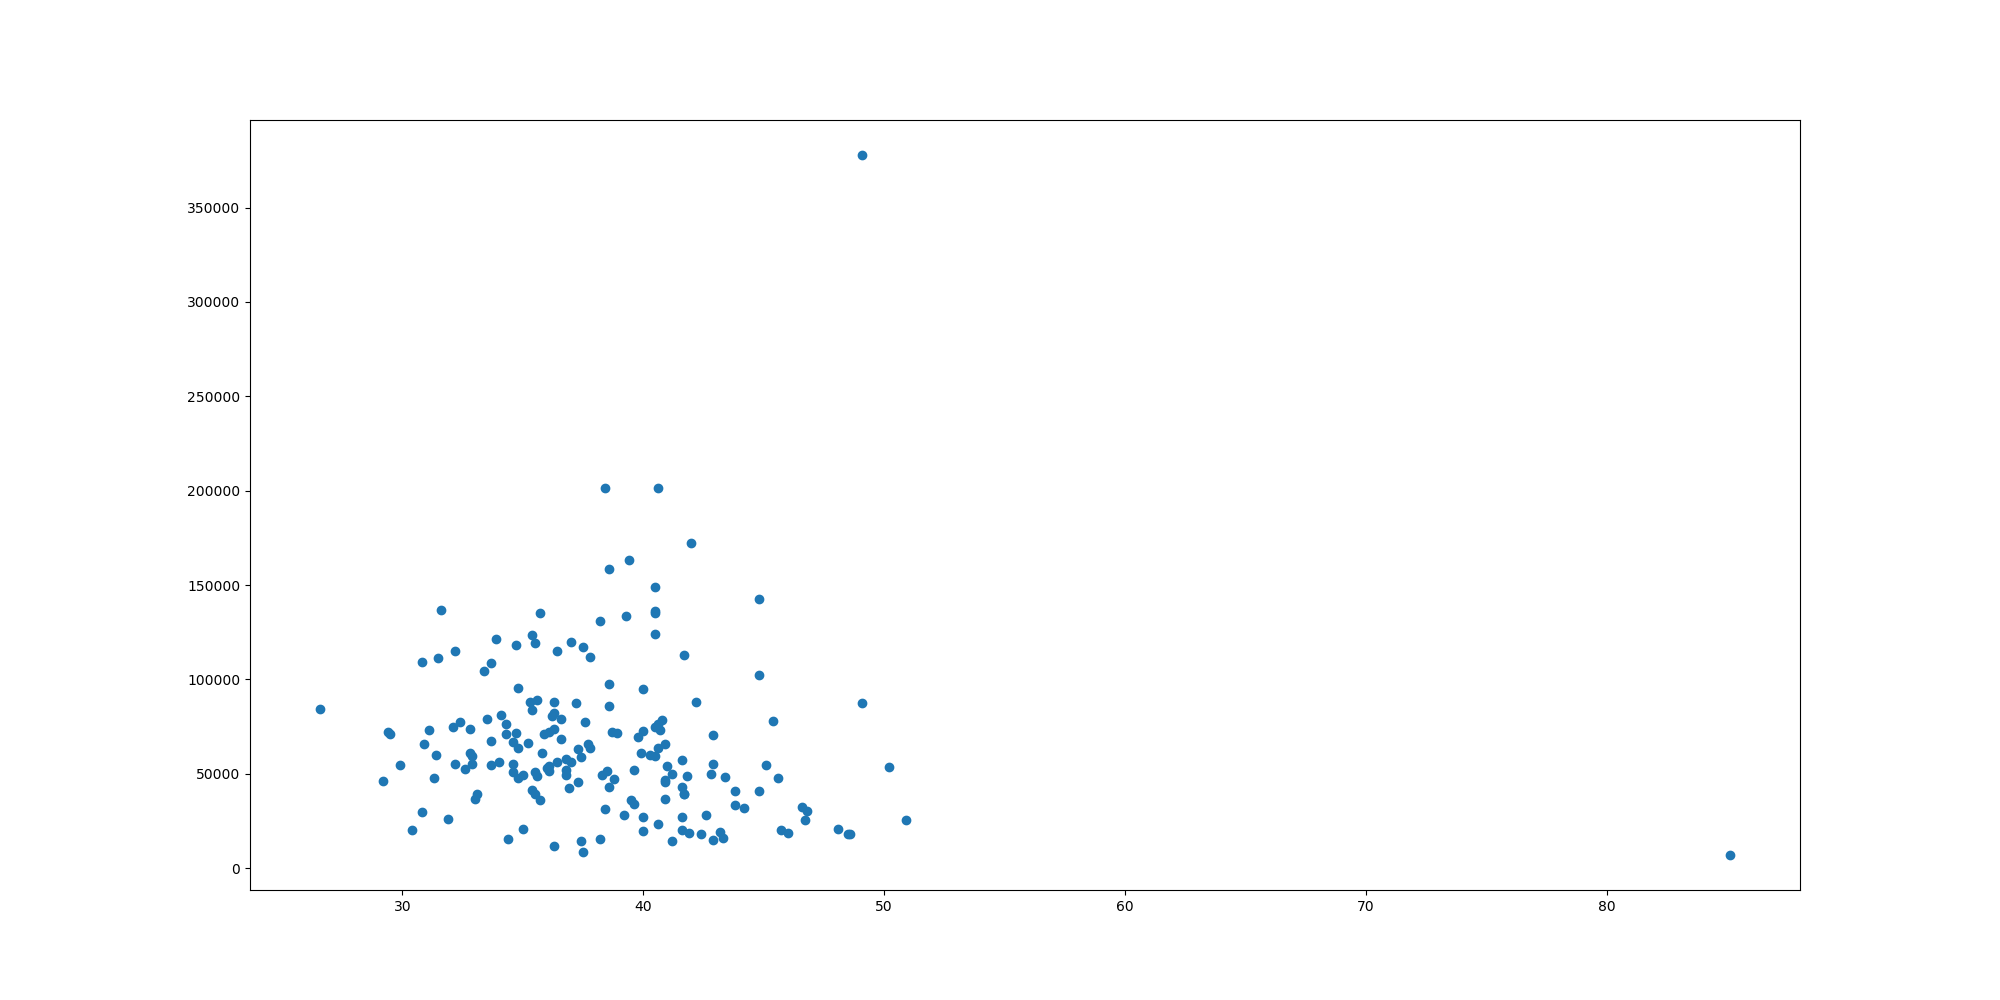

In [10]:
xma = acsimport["Median Age"]
plt.scatter(xma, y)
plt.show()

In [5]:


#negative binomial model positive cases
famnegbin = sm.families.NegativeBinomial()
offset = np.log(acsimport['total_pop'])
exog = acsimport[['Median Income', 'Median Age', 'Percent Female', 'Percent POC', 'Speaks only English %']]
endog = acsimport[['updatedhhcpositivetests']]
glm_negbin = sm.GLM(endog, exog,M=sm.robust.norms.HuberT(),family=famnegbin,link='log',offset=offset)
negbin_results=glm_negbin.fit(cov_type="hc1")
print(negbin_results.summary())

/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['M', 'link']
  warnings.warn(msg, ValueWarning)
/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['M', 'link']
  warnings.warn(msg, ValueWarning)


                    Generalized Linear Model Regression Results                    
Dep. Variable:     updatedhhcpositivetests   No. Observations:                  178
Model:                                 GLM   Df Residuals:                      173
Model Family:             NegativeBinomial   Df Model:                            4
Link Function:                         Log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1483.8
Date:                     Tue, 23 Aug 2022   Deviance:                       57.576
Time:                             17:33:00   Pearson chi2:                     65.6
No. Iterations:                         12   Pseudo R-squ. (CS):             0.2536
Covariance Type:                       hc1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [3]:
# exponentiating results for testing rate
print('Median Income')
print(np.exp(-1.007e-05))
#print(np.exp(-0.000),np.exp(0.000))

 

print('Median Age')
print(np.exp(-0.0115))
#print(np.exp(-0.060),np.exp(-0.048))

 

print('Percent Female')
print(np.exp(1.0481))
#print(np.exp(-0.000),np.exp(0.000))

 

print('Percent POC')
print(np.exp(-0.0228 ))
#print(np.exp(-0.0000966),np.exp(-0.000))

 

print('Speaks only English %')
print(np.exp( 0.4689))
#print(np.exp(-0.000),np.exp(0.000))

Median Income
0.9999899300507022
Median Age
0.988565872247913
Percent Female
2.8522267357338915
Percent POC
0.9774579558165845
Speaks only English %
1.5982351672464736
